# Homework1

Please upload to Moodle your archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. Please also prepare a requirements.txt file which lists all the packages that you use for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".
Please name your archive using your full name and student id. For your Notebook please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write.
Your code and analysis is like a story that awaits to be read, make it a nice story please!

**Deadline: Sunday, 26 February, 2017, midnight.** 

## Exercises

This homework focuses on data exploration and preparation for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. The goal is to explore and transform the data to try and understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product.

We have a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [50] Prepare a data quality report for the CSV file. 
    - [2.5] Check how many rows and columns your CSV has.
    - [2.5] Show the first and the last 5 rows.
    - [10] Prepare a table with descriptive statistics for all the continuous features.
    - [10] Prepare a table with descriptive statistics for all the categorical features.
    - [5] Drop duplicate rows and columns, if any.
    - [5] Drop constant columns, if any.
    
    For the updated CSV and data frame (after column/row removal):
    - [2.5] Prepare a table with descriptive statistics for all the continuous features.
    - [2.5] Prepare a table with descriptive statistics for all the categorical features.
    - [2.5] Plot histograms for all the continuous features.
    - [2.5] Plot box plots for all the continuous features.
    - [2.5] Plot bar plots for all the categorical features.
    - [2.5] Save all the tables, plots and initial discussion of your findings, into a single data quality report file.   

(2). [30] Prepare a data quality plan for the CSV file.
    - [10] Mark down all the features where there are potential problems or data quality issues.
    - [10] Propose solutions to deal with the problems identified. Explain why did you choose one solution over (potentially many) other.
    - [10] Apply your solutions to obtain a new CSV file where the data quality issues identified were addressed. Save the new CSV file with a self_explanatory name. Save the data quality plan to a single file (as a table or structured text).
        
(3). [20] Exploring relationships between feature pairs:
    - [10] Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.
    - [10] Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (IsWinner)? Explain in plain words (a short paragraph) the story of your findings so far.


# Importing packages and reading in the csv file.

In [147]:
# Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns # used for plots and pairwise feature interactions
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [148]:
# Reading from a csv file, into a data frame
# This csv file is in the same folder and the notebook file, therefore it does not need a full path
df = pd.read_csv('amazon-offers-10k-samples-raw.csv')

# (1) Data quality report for the CSV file.

## Check how many rows and columns your CSV has.

In [149]:
# Number of rows and columns in this dataframe displayed as (row no., column no.)
df.shape

(10000, 21)

## Show the first and the last 5 rows.

In [150]:
df.head(5) # first 5 rows

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1207135739277432339,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1789487307643024748,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5452082314297826053,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2572277640783537773,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8704029307873847986,8.99,CAD,24,48,NOW,1,CA,ON,new


In [151]:
df.tail(5) # last 5 rows

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
9995,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,"Dispatched from England by Priority Airmail, a...",1,0,92.72,CAD,91,...,-1888136325356517677,7.50,CAD,72,96,NOW,1,NaN,NaN,new
9996,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,96.77,CAD,88,...,-6639690782514669126,11.84,CAD,96,120,NOW,1,NaN,NaN,new
9997,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,110.68,CAD,96,...,9012427554787096099,6.00,CAD,24,48,NOW,1,NaN,NaN,new
9998,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,105.73,CAD,0,...,3846853762521352076,15.26,CAD,24,48,NOW,1,NaN,NaN,new
9999,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,Duty free - Ships from USA,1,0,134.25,CAD,98,...,1163115142515862290,0.00,CAD,24,48,NOW,1,US,CA,new


## Prepare a table with descriptive statistics for all the continuous features.

In [152]:
# Show the data types in each column
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'
df.dtypes

IsWinner                    int64
MarketplaceId               int64
ProductId                   int64
TimeOfOfferChange          object
ConditionNotes             object
IsFeaturedMerchant          int64
IsFulfilledByAmazon         int64
ListingPrice              float64
ListingCurrency            object
SellerFeedbackRating        int64
SellerFeedbackCount         int64
SellerId                    int64
ShippingPrice             float64
ShippingCurrency           object
ShippingTime_minHours       int64
ShippingTime_maxHours       int64
ShippingTime_availtype     object
ShipsDomestically           int64
ShipsFromCountry           object
ShipsFromState             object
SubCondition               object
dtype: object

Classifying data types as either continous or categorical (as appropriate) based on an inspection of the type of data contained.

In [153]:
# Select columns containing categorical data
categorical_columns = df[['IsWinner','IsFeaturedMerchant','IsFulfilledByAmazon','ListingCurrency','ShippingCurrency', 'ShippingTime_availtype', 'ShipsDomestically', 'ShipsFromCountry', 'ShipsFromState', 'SubCondition']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [154]:
# data types after the conversion
df.dtypes

IsWinner                  category
MarketplaceId                int64
ProductId                    int64
TimeOfOfferChange           object
ConditionNotes              object
IsFeaturedMerchant        category
IsFulfilledByAmazon       category
ListingPrice               float64
ListingCurrency           category
SellerFeedbackRating         int64
SellerFeedbackCount          int64
SellerId                     int64
ShippingPrice              float64
ShippingCurrency          category
ShippingTime_minHours        int64
ShippingTime_maxHours        int64
ShippingTime_availtype    category
ShipsDomestically         category
ShipsFromCountry          category
ShipsFromState            category
SubCondition              category
dtype: object

In [155]:
# Descriptive stats for continuous features
df.describe()

,MarketplaceId,ProductId,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,1.156462e+18,5.534192e+16,215.881699,89.039700,6915.794700,9.780680e+17,12.396776,57.136800,88.663200
std,2.355318e+04,5.308389e+18,255.581702,21.470301,10970.179276,4.952648e+18,26.361234,82.450908,119.827413
min,1.156462e+18,-9.172604e+18,3.240000,0.000000,0.000000,-9.136118e+18,0.000000,0.000000,0.000000
25%,1.156462e+18,-4.356483e+18,63.330000,91.000000,338.000000,-2.572278e+18,0.000000,24.000000,48.000000
50%,1.156462e+18,2.477570e+16,126.020000,95.000000,3293.000000,1.163115e+18,7.500000,24.000000,48.000000
75%,1.156462e+18,5.056101e+18,257.892500,96.000000,8452.000000,5.477945e+18,13.640000,96.000000,120.000000
max,1.156462e+18,9.207147e+18,3194.320000,100.000000,41420.000000,9.174048e+18,705.270000,672.000000,1008.000000


In [156]:
# Descriptive stats for continuous features - transposed table
# One feature per row, stats in the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MarketplaceId,10000.0,1.156462e+18,2.355318e+04,1.156462e+18,1.156462e+18,1.156462e+18,1.156462e+18,1.156462e+18
ProductId,10000.0,5.534192e+16,5.308389e+18,-9.172604e+18,-4.356483e+18,2.477570e+16,5.056101e+18,9.207147e+18
ListingPrice,10000.0,2.158817e+02,2.555817e+02,3.240000e+00,6.333000e+01,1.260200e+02,2.578925e+02,3.194320e+03
SellerFeedbackRating,10000.0,8.903970e+01,2.147030e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02
SellerFeedbackCount,10000.0,6.915795e+03,1.097018e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04
SellerId,10000.0,9.780680e+17,4.952648e+18,-9.136118e+18,-2.572278e+18,1.163115e+18,5.477945e+18,9.174048e+18
ShippingPrice,10000.0,1.239678e+01,2.636123e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.364000e+01,7.052700e+02
ShippingTime_minHours,10000.0,5.713680e+01,8.245091e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02
ShippingTime_maxHours,10000.0,8.866320e+01,1.198274e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03


## Prepare a table with descriptive statistics for all the categorical features.

In [157]:
# Descriptive stats for categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
IsWinner,10000,2,0,9451
IsFeaturedMerchant,10000,2,1,8166
IsFulfilledByAmazon,10000,2,0,9632
ListingCurrency,10000,1,CAD,10000
ShippingCurrency,10000,1,CAD,10000
ShippingTime_availtype,10000,1,NOW,10000
ShipsDomestically,10000,1,1,10000
ShipsFromCountry,6273,13,CA,3668
ShipsFromState,5880,24,ON,2220
SubCondition,10000,1,new,10000


## Drop duplicate rows and columns, if any.

In [158]:
# duplicated(): returns a boolean - outputs 'true' is an entire row is a duplicate of a row above it.
# The 'true' instances are then counted using sum()
df.duplicated().sum()

114

In [159]:
# using drop_duplicates(), default is keep ='first' as parameter.
df = df.drop_duplicates()

In [160]:
df.duplicated().sum() # check again for duplicates

0

In [161]:
# After duplicated rows removed
df.shape

(9886, 21)

On inspection, there does not appear to be any columns that are duplicates of each other.

## Drop constant columns, if any.

In [162]:
# Print all the coloumn headers and the number of unique values in each coloumn
# Coloumns with unique value of 1 has a constant value 
print("Feature, UniqueValues") 
for column in df:
    print(column + "," + str(len(df[column].unique())))

Feature, UniqueValues
IsWinner,2
MarketplaceId,1
ProductId,307
TimeOfOfferChange,548
ConditionNotes,436
IsFeaturedMerchant,2
IsFulfilledByAmazon,2
ListingPrice,4976
ListingCurrency,1
SellerFeedbackRating,25
SellerFeedbackCount,123
SellerId,187
ShippingPrice,1104
ShippingCurrency,1
ShippingTime_minHours,12
ShippingTime_maxHours,11
ShippingTime_availtype,1
ShipsDomestically,1
ShipsFromCountry,14
ShipsFromState,25
SubCondition,1


In [163]:
# Drop columns with UniqueValues = 1

# Feature, UniqueValues
# MarketplaceId,1
# ListingCurrency,1
# ShippingCurrency,1
# ShippingTime_availtype,1
# ShipsDomestically,1
# SubCondition,1

# The '1' below indicates column:
df = df.drop('MarketplaceId', 1)
df = df.drop('ListingCurrency', 1)
df = df.drop('ShippingCurrency', 1)
df = df.drop('ShippingTime_availtype', 1)
df = df.drop('ShipsDomestically', 1)
df = df.drop('SubCondition', 1)

In [164]:
df.shape # after 6 columns of constant columns removed

(9886, 15)

## Prepare a table with descriptive statistics for all the continuous features.

In [165]:
#Look at continous columns - all of which are of numeric data type in this data frame
continuous_columns = df.select_dtypes(['int64', 'float64']).columns
continuous_columns

Index(['ProductId', 'ListingPrice', 'SellerFeedbackRating',
       'SellerFeedbackCount', 'SellerId', 'ShippingPrice',
       'ShippingTime_minHours', 'ShippingTime_maxHours'],
      dtype='object')

In [166]:
# Descriptive stats for continuous features - transposed table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ProductId,9886.0,6.104485e+16,5.315584e+18,-9.172604e+18,-4.356483e+18,2.477570e+16,5.056101e+18,9.207147e+18
ListingPrice,9886.0,2.164802e+02,2.565794e+02,3.240000e+00,6.363000e+01,1.259900e+02,2.578625e+02,3.194320e+03
SellerFeedbackRating,9886.0,8.897593e+01,2.155962e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02
SellerFeedbackCount,9886.0,6.910402e+03,1.091824e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04
SellerId,9886.0,9.641003e+17,4.919222e+18,-9.136118e+18,-2.572278e+18,1.163115e+18,5.477945e+18,9.174048e+18
ShippingPrice,9886.0,1.243470e+01,2.647657e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.368000e+01,7.052700e+02
ShippingTime_minHours,9886.0,5.726644e+01,8.280107e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02
ShippingTime_maxHours,9886.0,8.887477e+01,1.203972e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03


## Prepare a table with descriptive statistics for all the categorical features.

In [167]:
#Look at categorical columns - marked as 'category' data type
categorical_columns = df.select_dtypes(['category']).columns
categorical_columns

Index(['IsWinner', 'IsFeaturedMerchant', 'IsFulfilledByAmazon',
       'ShipsFromCountry', 'ShipsFromState'],
      dtype='object')

In [168]:
# Descriptive stats for categorical features
df[categorical_columns].describe().T

,count,unique,top,freq
IsWinner,9886,2,0,9339
IsFeaturedMerchant,9886,2,1,8090
IsFulfilledByAmazon,9886,2,0,9519
ShipsFromCountry,6217,13,CA,3655
ShipsFromState,5851,24,ON,2211


## Plot histograms for all the continuous features.
The ProductId and the SellerId have been plotted here because I wanted to see a visual representation of the range of products and sellers in the dataset. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3d00b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1174a59b0>]], dtype=object)

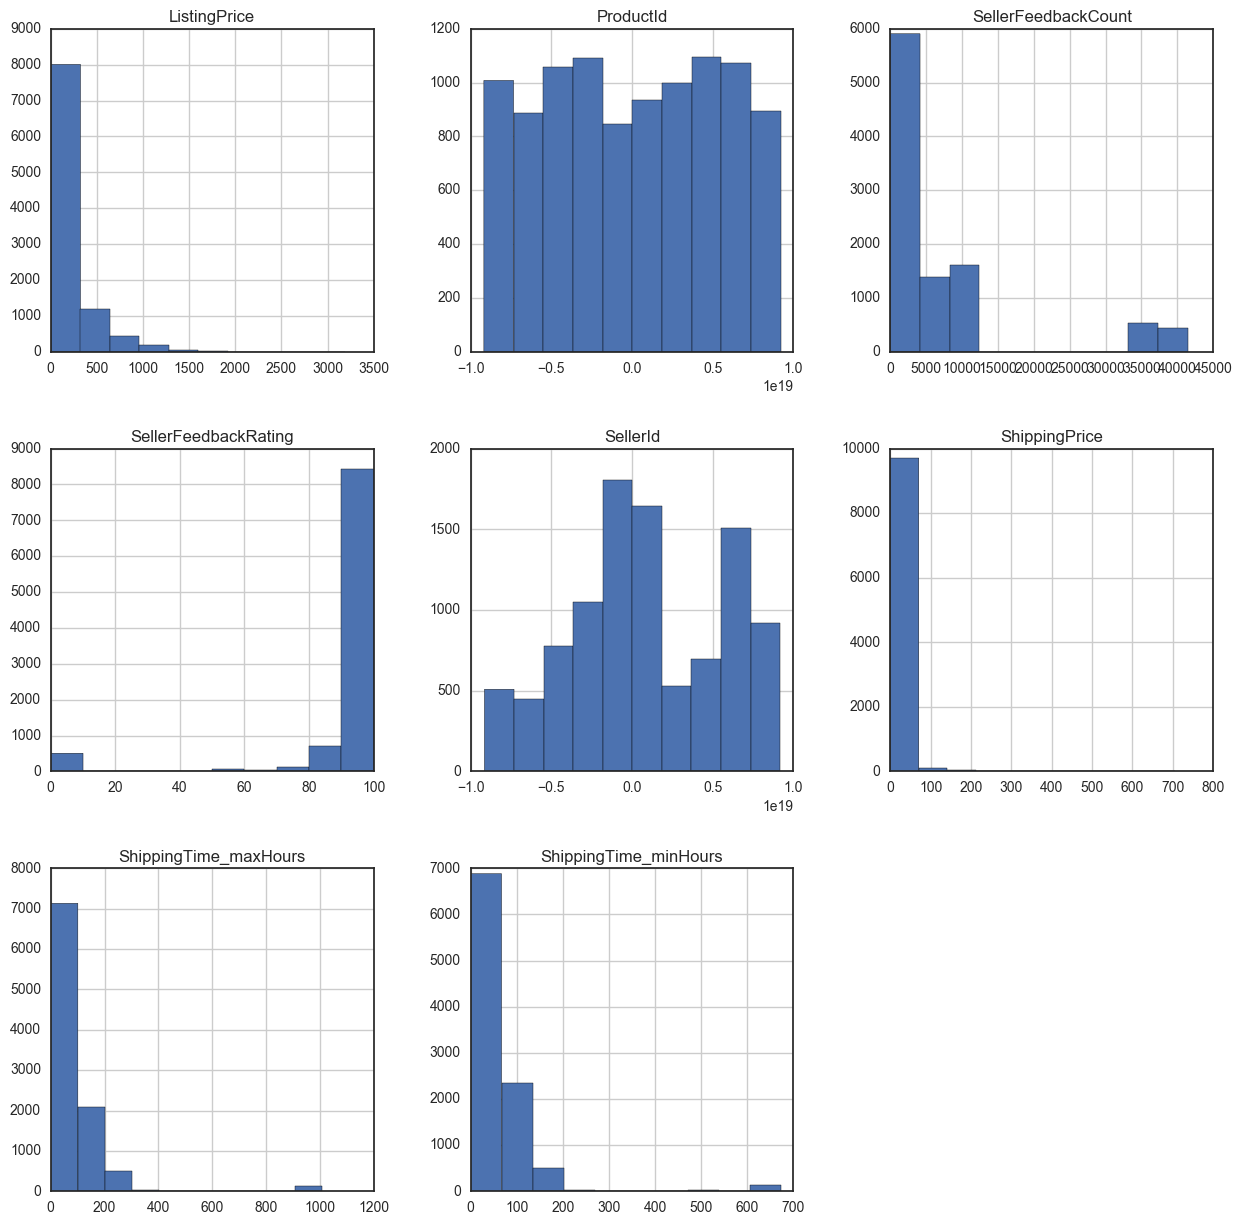

In [169]:
# Plot a histogram of the continuous features
df[continuous_columns].hist(figsize=(15,15))

## Plot box plots for all the continuous features.

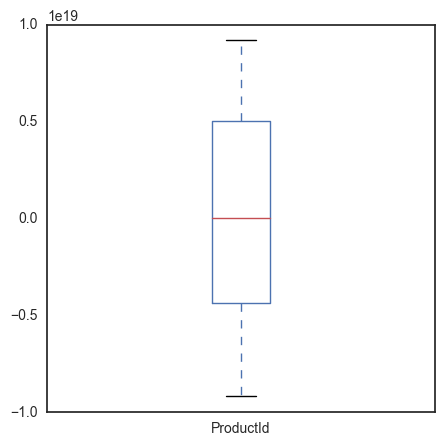

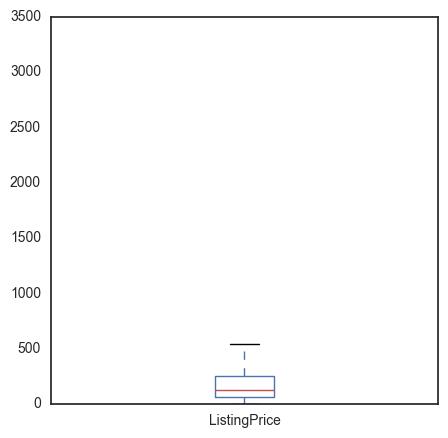

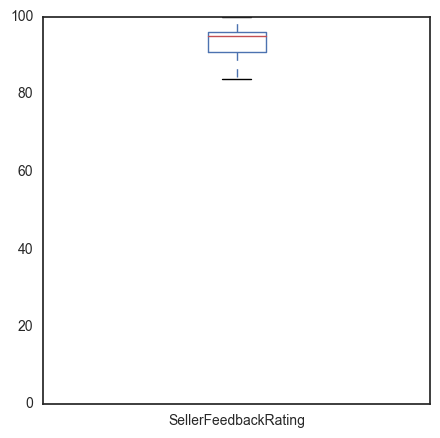

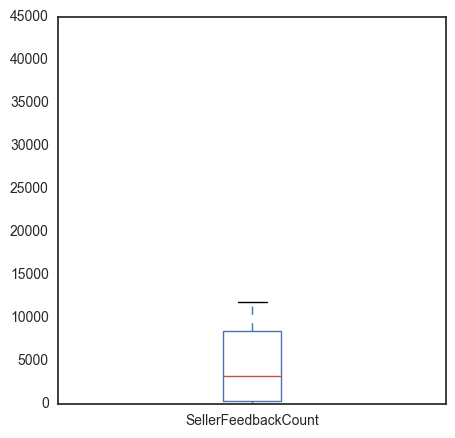

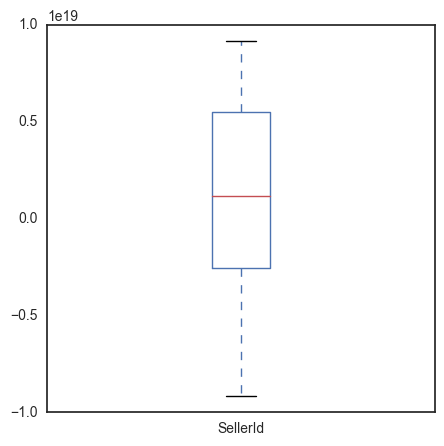

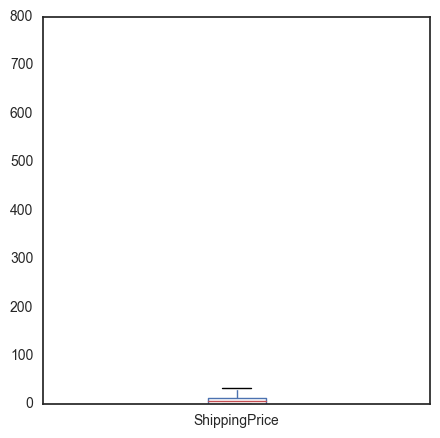

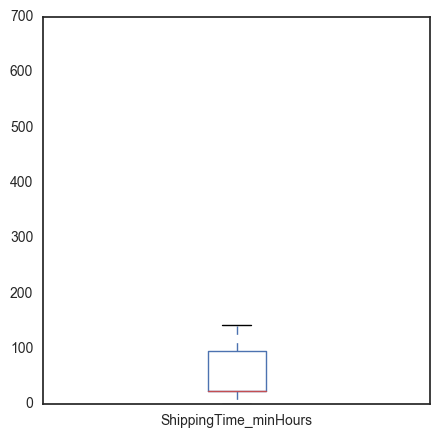

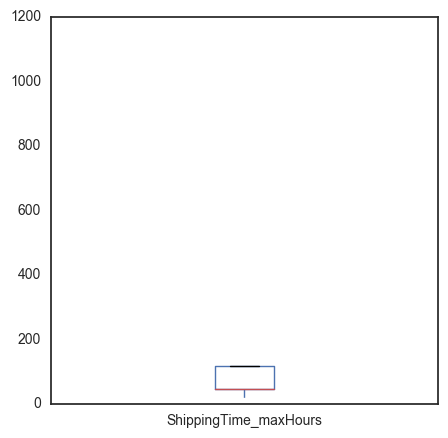

In [170]:
for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(5,5))
    plt.show()


## Plot bar plots for all the categorical features.

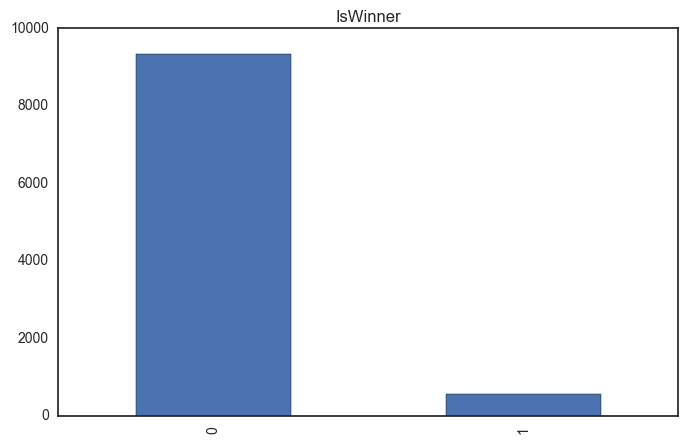

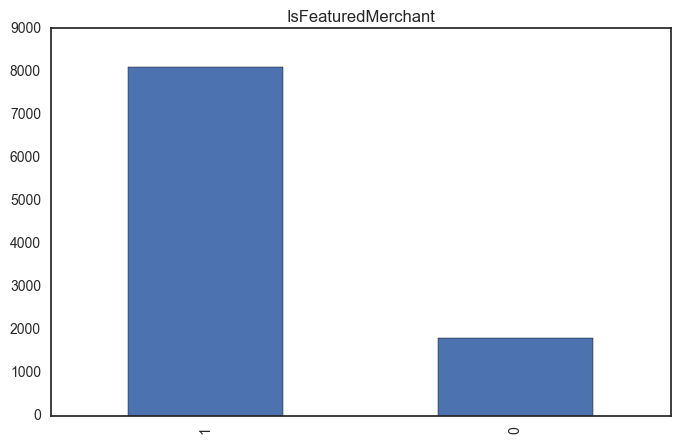

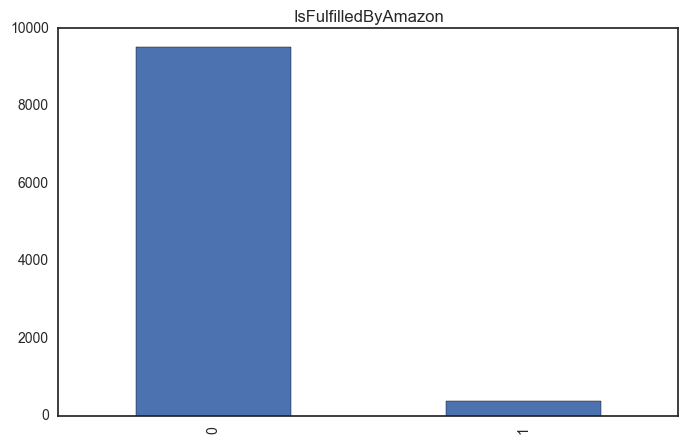

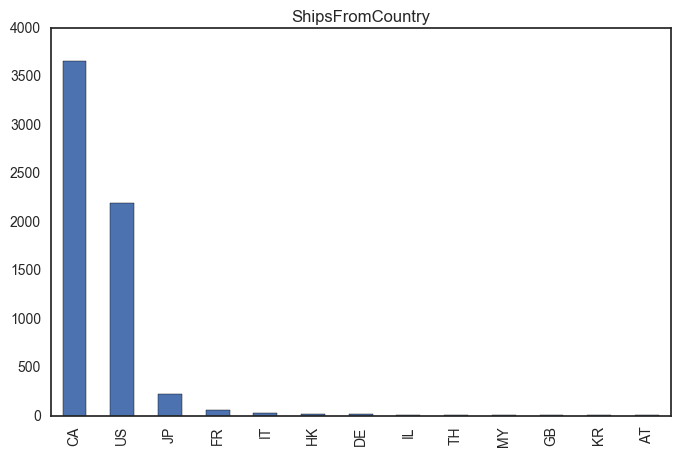

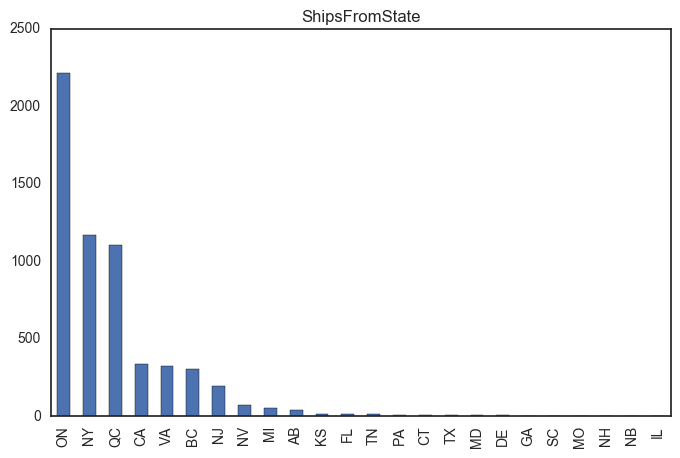

In [171]:
for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(8,5))
    plt.show()

# (2) Prepare a data quality plan for the CSV file.
## Mark down all the features where there are potential problems or data quality issues.

## Irregular cardinality

Categorical features can have irregular cardinality if the same value is entered several times with a different spelling for example. In the following cell, I check whether there are any values in the categorical features which are duplicated because 
of spelling mistakes or different input standards

In [172]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- IsWinner:", pd.unique(df.IsWinner.ravel()))
print("\n- IsFeaturedMerchant:", pd.unique(df.IsFeaturedMerchant.ravel()))
print("\n- IsFulfilledByAmazon:", pd.unique(df.IsFulfilledByAmazon.ravel()))
print("\n- ShipsFromCountry:", pd.unique(df.ShipsFromCountry.ravel()))
print("\n- ShipsFromState:", pd.unique(df.ShipsFromState.ravel()))

Unique values for:
- IsWinner: [0 1]

- IsFeaturedMerchant: [1 0]

- IsFulfilledByAmazon: [1 0]

- ShipsFromCountry: [nan 'CA' 'US' 'HK' 'JP' 'IT' 'DE' 'FR' 'MY' 'GB' 'TH' 'IL' 'AT' 'KR']

- ShipsFromState: [nan 'ON' 'AB' 'NY' 'QC' 'NV' 'VA' 'NJ' 'CA' 'BC' 'MI' 'PA' 'TX' 'KS' 'FL'
 'NH' 'MD' 'TN' 'SC' 'MO' 'DE' 'NB' 'CT' 'GA' 'IL']


There does not appear to be any duplications in the cardinality of categorical features.

## Null values
Checking for null values in the dataset.

In [173]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

IsWinner                    0
ProductId                   0
TimeOfOfferChange           0
ConditionNotes           4626
IsFeaturedMerchant          0
IsFulfilledByAmazon         0
ListingPrice                0
SellerFeedbackRating        0
SellerFeedbackCount         0
SellerId                    0
ShippingPrice               0
ShippingTime_minHours       0
ShippingTime_maxHours       0
ShipsFromCountry         3669
ShipsFromState           4035
dtype: int64

There are 3 columns in the dataset containing some null values. 

ConditionNotes - it does not seem absolutely necessary to have notes, therefore null values here does not materially affect the integrity of the data.

ShipsFromCountry & ShipsFromState - values would be expected for each of these columns. But there appears to be a large proportion of fields will null values in each case. However, it is debatable as to how relevant this information is to the outcome of 'isWinner'.

## Outliers
In the box plots produced above, there are a number of outliers for the listing price, shipping price and shipping time in hours (minimum and maximum). They could be error in the data or represent correct information. The following cells look at the top 5 outliers for each of these columns.

I have ignored the outliers relating to seller feedback rating and feedback count, as I am not convinced this analysis will add the the overall analysis.

### Outliers - ListingPrices

In [174]:
# Find out the 5 highest ListingPrices
df.sort_values(by='ListingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
9069,0,2471683711038624825,2016-02-04T05:26:20.217Z,NaN,1,0,3194.32,96,1327,8648764257939339698,0.00,24,48,NaN,NaN
6890,0,2471683711038624825,2016-02-04T04:55:25.453Z,NaN,1,0,3194.32,96,1327,8648764257939339698,0.00,24,48,NaN,NaN
4947,0,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,1,0,3194.32,96,1326,8648764257939339698,0.00,24,48,NaN,NaN
152,0,-5924928993300787167,2016-02-04T04:30:08.154Z,"GST/HST Only, No PST. Part Mummber: 184755",1,0,2999.00,95,4384,-2572277640783537773,12.12,24,48,CA,ON
4830,0,1711327863243739776,2016-02-04T04:34:33.189Z,"GST/HST Only, No PST. Part Number: ET91000SFP2",1,0,2999.00,95,4385,-2572277640783537773,12.52,24,48,CA,ON


The five highest listing prices relate to 3 product IDs. The next step is the see whether the prices are listed correctly, or whether they are errors.
For each ProductId, the ListingPrice is looked at in detail below, to see if there is much variation in the ListingPrice for a given product ID.

In [175]:
df_O1 = df.loc[df['ProductId'] == 2471683711038624825]
df_O1.head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
4931,1,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,1,1,472.76,0,0,1207135739277432339,0.00,0,0,NaN,NaN
4932,0,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,1,0,506.67,95,10182,7102261811958052132,14.73,96,120,CA,BC
4933,0,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,0,0,499.00,93,3182,7600946845041350706,30.50,24,48,CA,ON
4934,0,2471683711038624825,2016-02-04T04:34:45.419Z,Ownership. Respect. Family. An Employee Owned ...,0,0,552.99,84,161,-3129154375621551414,0.00,24,48,CA,ON
4935,0,2471683711038624825,2016-02-04T04:34:45.419Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,559.44,95,4078,-1789487307643024748,0.00,48,72,CA,ON


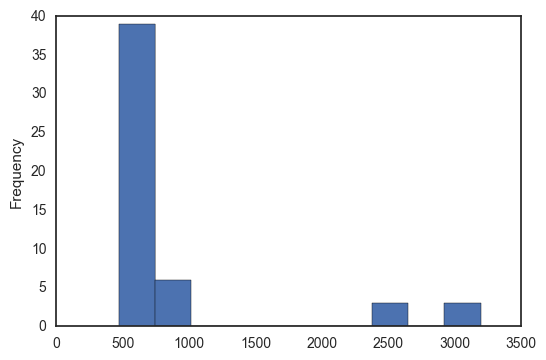

In [176]:
df_O1['ListingPrice'].plot(kind='hist')

The outliers in price shown above look unrealistic, given it's for the same ProductId. This could be due to reasons such as error or data corruption.

In [177]:
df_O2 = df.loc[df['ProductId'] == 1711327863243739776]
df_O2.head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
4683,1,1711327863243739776,2016-02-04T04:35:03.792Z,NaN,1,1,167.98,0,0,1207135739277432339,0.00,0,0,NaN,NaN
4684,0,1711327863243739776,2016-02-04T04:35:03.792Z,"100% Duty Free Shopping. We prepay ALL Duties,...",1,0,213.18,91,3459,7235704646333918828,0.00,24,48,NaN,NaN
4685,0,1711327863243739776,2016-02-04T04:35:03.792Z,NaN,1,0,185.16,93,2521,-5016003493506265192,28.42,24,48,US,VA
4686,0,1711327863243739776,2016-02-04T04:35:03.792Z,"Brand new items, Experienced seller, Shipping ...",1,0,219.17,96,35270,6791568714796518563,0.00,96,120,CA,QC
4687,0,1711327863243739776,2016-02-04T04:35:03.792Z,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,1,0,225.14,91,10606,-1177408302343430963,5.00,24,48,NaN,NaN


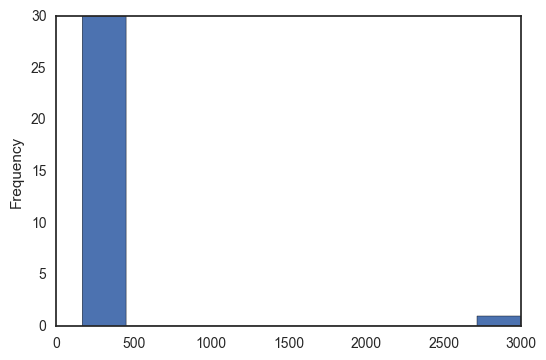

In [178]:
df_O2['ListingPrice'].plot(kind='hist')

The outliers in price shown above look unrealistic, given it's for the same ProductId. This could be due to reasons such as error or data corruption.

In [179]:
df_O3 = df.loc[df['ProductId'] == -5924928993300787167]
df_O3.head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
137,1,-5924928993300787167,2016-02-04T04:30:08.154Z,NaN,1,1,44.99,0,0,1207135739277432339,0.00,0,0,NaN,NaN
138,0,-5924928993300787167,2016-02-04T04:30:08.154Z,"Brand new items, Experienced seller, Shipping ...",1,0,49.38,96,35264,6791568714796518563,0.00,96,120,CA,QC
139,0,-5924928993300787167,2016-02-04T04:30:08.154Z,NaN,0,0,43.32,98,3293,4143506568603310959,13.09,96,120,US,NY
140,0,-5924928993300787167,2016-02-04T04:30:08.154Z,NaN,1,0,53.54,96,1790,1788801474825896666,9.98,96,120,US,NY
141,0,-5924928993300787167,2016-02-04T04:30:08.154Z,NaN,1,0,55.45,96,1790,1788801474825896666,9.98,96,120,US,NY


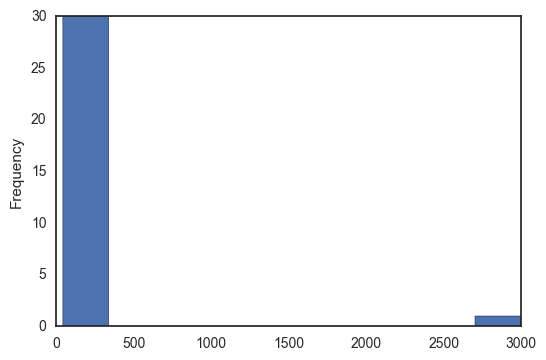

In [180]:
df_O3['ListingPrice'].plot(kind='hist')

The outliers in price shown above look unrealistic, given it's for the same ProductId. This could be due to reasons such as error or data corruption.

### Conclusion - ListingPrices Outliers
The outliers relate to 3 product IDs. After looking at the list prices for each of these product IDs, it appears the outliers are most likely due to reason such as error or data corruption as the list price for the majority of these items is far below the outliers and are within a limited range.

### Outliers - ShippingPrice


In [181]:
# Find out the 5 highest ShipppingPrice
df.sort_values(by='ShippingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
1343,0,229338471365409007,2016-02-04T04:31:42.793Z,NaN,1,0,679.80,88,8452,-6639690782514669126,705.27,96,120,NaN,NaN
7392,0,229338471365409007,2016-02-04T04:56:20.610Z,NaN,1,0,679.80,88,8452,-6639690782514669126,705.27,96,120,NaN,NaN
5775,0,-281933683550746337,2016-02-04T04:38:39.530Z,NaN,1,0,503.49,88,8452,-6639690782514669126,575.09,96,120,NaN,NaN
610,0,-281933683550746337,2016-02-04T04:30:51.960Z,NaN,1,0,503.49,88,8452,-6639690782514669126,575.09,96,120,NaN,NaN
5067,0,5537362123079696830,2016-02-04T04:38:26.118Z,NaN,1,0,258.04,88,8452,-6639690782514669126,445.65,96,120,NaN,NaN


In [182]:
df_O4 = df.loc[df['SellerId'] == -6639690782514669126]
df_O4.head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
29,0,-6219878023547990916,2016-02-04T04:27:21.627Z,NaN,1,0,102.71,88,8452,-6639690782514669126,13.19,96,120,NaN,NaN
47,0,-2406396100216511638,2016-02-04T04:29:07.495Z,NaN,1,0,81.26,88,8452,-6639690782514669126,13.94,96,120,NaN,NaN
73,0,-9131643267408786185,2016-02-04T04:29:11.671Z,NaN,1,0,122.90,88,8452,-6639690782514669126,13.94,96,120,NaN,NaN
86,0,-5701463121023377686,2016-02-04T04:30:06.510Z,NaN,1,0,67.60,88,8452,-6639690782514669126,26.66,96,120,NaN,NaN
112,0,-7405035237453204588,2016-02-04T04:30:05.605Z,NaN,1,0,14.28,88,8452,-6639690782514669126,9.90,24,48,NaN,NaN


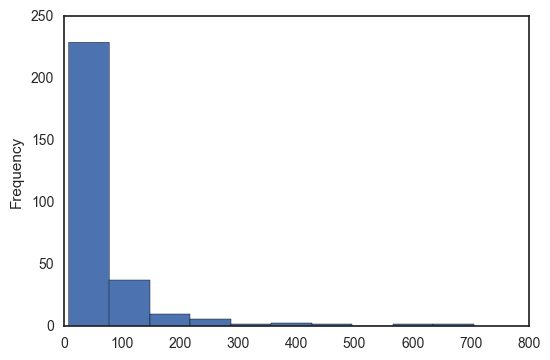

In [183]:
df_O4['ShippingPrice'].plot(kind='hist')

### Conclusion - ShippingPrice
One seller (Id -6639690782514669126) is associated with the top 5 outliers in shipping price. Generally, the shipping price of a product is only a fraction of the list price(say 5% to 10%), but in the case of these outliers, the shipping price is very near, and sometimes greater than the list price. It is probable that these outliers are incorrect.

### Outliers - SellerFeedbackRating

In [184]:
# Find out the 5 highest SellerFeedbackRating
df.sort_values(by='SellerFeedbackRating', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
4465,0,-6987409544462956993,2016-02-04T04:34:45.091Z,Can not ship order to PO boxes or remote areas...,1,0,179.14,100,384,4987276067789979672,17.90,24,48,CA,ON
847,0,-948779765034601715,2016-02-04T04:31:19.832Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,778.49,100,4601,5657218934756058127,0.00,24,48,CA,ON
2468,0,2331308440699116991,2016-02-04T04:32:21.260Z,"Your authorized reseller for Microsoft, Adobe,...",0,0,539.76,100,88,-5258359040471270597,62.43,24,48,US,DE
2977,0,1531586371501966694,2016-02-04T04:33:24.872Z,Can not ship order to PO boxes or remote areas...,1,0,74.15,100,384,4987276067789979672,16.99,24,48,CA,ON
7124,0,-8796291674889166687,2016-02-04T04:55:49.776Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,117.90,100,4601,5657218934756058127,0.00,24,48,CA,ON


### Conclusion - SellerFeedbackRating
There are 3 sellers and 5 different products associated with these outliers.
It is difficult to draw any conclusions here without additional analysis.

### Outliers - SellerFeedbackCount

In [185]:
# Find out the 5 highest SellerFeedbackCount
df.sort_values(by='SellerFeedbackCount', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
2466,0,-5545190337175589068,2016-02-04T04:32:19.017Z,NaN,1,0,39.91,96,41420,9012427554787096099,12.0,24,48,NaN,NaN
8981,0,3864781223791788768,2016-02-04T05:26:15.632Z,NaN,1,0,43.71,96,41420,9012427554787096099,6.0,24,48,NaN,NaN
9834,0,-353902426769369969,2016-02-04T05:41:07.145Z,NaN,1,0,137.21,96,41420,9012427554787096099,8.0,96,120,NaN,NaN
6147,0,-1203282458825787586,2016-02-04T04:55:59.174Z,"Ships from Canada. Not additional duties, no c...",1,0,92.42,96,41420,9012427554787096099,7.0,24,48,NaN,NaN
1984,0,-6519688935575603899,2016-02-04T04:31:54.801Z,"Ships from Canada. Not additional duties, no c...",1,0,183.16,96,41420,9012427554787096099,19.3,96,120,NaN,NaN


### Conclusion - SellerFeedbackCount
There 1 seller and 5 different products associated with these outliers.
It is difficult to draw any conclusions here without additional analysis.

### Outliers - ShippingTime_minHours and ShippingTime_maxHours

In [186]:
# Find out the 5 highest ShippingTime_minHours
df.sort_values(by='ShippingTime_minHours', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
9524,0,7453706059544427211,2016-02-04T05:36:27.938Z,NaN,1,1,367.25,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
396,0,7049326277407521616,2016-02-04T04:30:31.163Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
7669,0,24775697167724061,2016-02-04T04:58:10.526Z,NaN,1,1,469.32,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
6455,0,7106195985037851238,2016-02-04T04:55:50.631Z,NaN,1,1,233.23,0,0,1207135739277432339,0.0,672,1008,NaN,NaN


In [187]:
# Find out the 5 highest ShippingTime_maxHours
df.sort_values(by='ShippingTime_maxHours', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
9524,0,7453706059544427211,2016-02-04T05:36:27.938Z,NaN,1,1,367.25,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
396,0,7049326277407521616,2016-02-04T04:30:31.163Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
7669,0,24775697167724061,2016-02-04T04:58:10.526Z,NaN,1,1,469.32,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
6455,0,7106195985037851238,2016-02-04T04:55:50.631Z,NaN,1,1,233.23,0,0,1207135739277432339,0.0,672,1008,NaN,NaN


### Conclusion - ShippingTime_minHours and ShippingTime_maxHours
Outlier rows for ShippingTime_minHours and ShippingTime_maxHours are the same.
Again, further analysis will be required to draw any conclusions.

## Solutions

#### Data Quality Plan

| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| ConditionNotes          | Missing Values (47%) | Do nothing                   |
| ShipsFromCountry        | Missing Values (37%) | Complete-case analysis       | 
| ShipsFromState          | Missing Values (41%) | Complete-case analysis       |
| ListingPrice            | Outliers             | Drop rows                    |
| SellerFeedbackRating    | Outliers             | Do nothing                   |
| SellerFeedbackCount     | Outliers             | Do nothing                   |
| ShippingPrice           | Outliers             | Drop rows                    |
| ShippingTime_minHours   | Outliers             | Do nothing                   |
| ShippingTime_maxHours   | Outliers             | Do nothing                   |

ConditionNotes:
47% of the dataset have null values for ConditionNotes. I am not removing the data from the set as I don't beleive it is a necessary field in very instance, therefore having null values here is not an issue.

ShipsFromCountry and ShipsFromState:
ShipsFromCountry and ShipsFromState have 37% and 41% null values respectively. I am leaving this data in, as I am not convinced at this stage if and how this information impacts 'IsWinner' target outcome. Further analysis may shed more light.

ListingPrice and ShippingPrice:
My analysis of outliers leads me to believe that ListingPrice and ShippingPrice outliers are incorrect data - perhaps due to error or data corruption of the csv file I am using. I am removing the outliers relating to both columns as I do not want this data to skew my later analysis. As explained in the Outliers section above, the majority of the prices falls within a narrow band, and these outliers look unrealistic in comparison.

SellerFeedbackRating and SellerFeedbackCount:
I think both SellerFeedbackRating and SellerFeedbackCount may be very relevant in the 'IsWinner' target outcome. I am not removing the outliers in both cases because I am interested to see whether there is a correlation between the data here and 'IsWinner'.

ShippingTime_minHours and ShippingTime_maxHours:
I am uncertain as to whether this information impacts the target outcome. I have decided to leave the outlier rows in until I can do some further analysis to understand whether or not there is a relationship here. 


## Apply your solutions to obtain a new CSV file where the data quality issues identified were addressed.

In [188]:
# generating another dataframe called df_cleaned and applying changes to it
# Dropping ListingPrice outliers:
clean_df = df
clean_df = clean_df.drop(clean_df.index[[9069,9069]])
clean_df = clean_df.drop(clean_df.index[[6890,6890]])
clean_df = clean_df.drop(clean_df.index[[4947,4947]])
clean_df = clean_df.drop(clean_df.index[[152,152]])
clean_df = clean_df.drop(clean_df.index[[4830,4830]])

In [189]:
# Dropping ShippingPrice outliers:
clean_df = clean_df.drop(clean_df.index[[1343,1343]])
clean_df = clean_df.drop(clean_df.index[[7392,7392]])
clean_df = clean_df.drop(clean_df.index[[5775,5775]])
clean_df = clean_df.drop(clean_df.index[[610,610]])
clean_df = clean_df.drop(clean_df.index[[5067,5067]])

In [190]:
# shape of new dataframe after outliers dropped per cells above.
clean_df.shape

(9876, 15)

In [191]:
# shape of original dataframe - no outliers dropped
df.shape

(9886, 15)

In [192]:
# Save cleaned dataframe to new CSV file
clean_df.to_csv('amazon-offers-samples-raw-cleaned.csv', index=False)

clean_df.head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.00,672,1008,NaN,NaN
1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72,CA,ON
2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,98,478,5452082314297826053,6.99,24,48,CA,ON
3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48,CA,ON
4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,94,105,-8704029307873847986,8.99,24,48,CA,ON


# (3) Exploring relationships between feature pairs.
## Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will use to look at pairwise feature interaction are the following continuous features:
- ListingPrice
- SellerFeedbackRating
- SellerFeedbackCount
- ShippingPrice


and the following categorical features:
- IsWinner
- IsFeaturedMerchant
- IsFulfilledByAmazon
- ShipsFromCountry
- ShipsFromState

## Categorical-categorical feature plots

In this section, I create stacked bar charts for pairs of categorical features. I create an extra column 'percent' in the dataframe in order to calculate the percentage of rows having particular values for a pair of features.

### IsWinner by IsFeaturedMerchant

(0, 100)

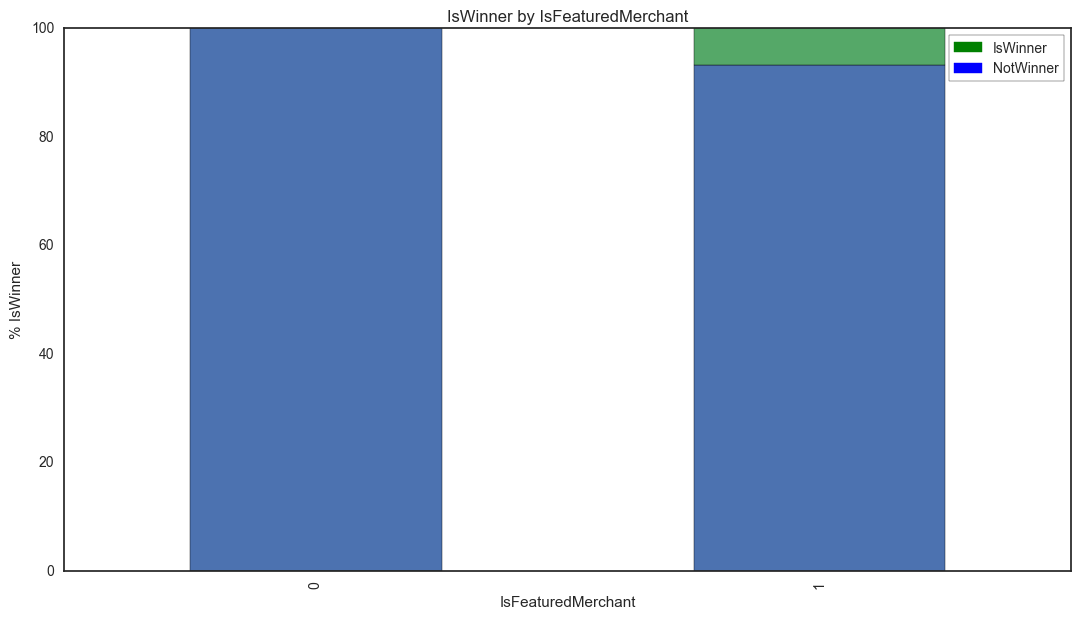

In [193]:
# Counts the number of IsFeaturedMerchant = 0 (i.e. negative result)
NotFeaturedMerchant_count = 1 / clean_df[clean_df.IsFeaturedMerchant == 0].count()['IsFeaturedMerchant']

# Counts the number of IsFeaturedMerchant = 1 (i.e. positive result)
IsFeaturedMerchant_count = 1 / clean_df[clean_df.IsFeaturedMerchant == 1].count()['IsFeaturedMerchant']

# Create a new column in the dataframe called percent and insert IsFeaturedMerchant_count in all cells
clean_df['percent'] = IsFeaturedMerchant_count * 100

# Find indexes of all rows containing negative value for IsFeaturedMerchant
index_list = clean_df[clean_df['IsFeaturedMerchant'] == 0].index.tolist()

# For each row with a 0 value, insert NotFeaturedMerchant_count in the percent column
for i in index_list:
    clean_df.loc[i, 'percent'] = NotFeaturedMerchant_count * 100

# Group dataframe by IsFeaturedMerchant and IsWinner and sum precent
category_group = clean_df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="IsWinner by IsFeaturedMerchant", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsWinner')
blue_patch = mpatches.Patch(color='blue', label='NotWinner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFeaturedMerchant")
my_plot.set_ylabel("% IsWinner")
my_plot.set_ylim([0,100])

### IsWinner by IsFulfilledByAmazon

(0, 100)

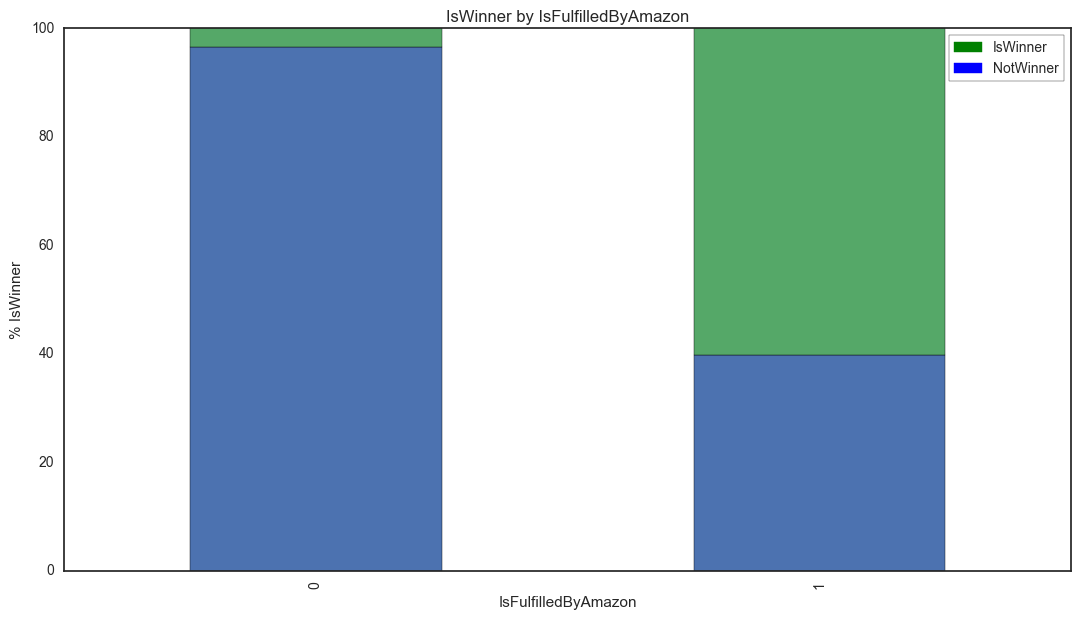

In [194]:
# Counts the number of IsFulfilledByAmazon = 0 (i.e. negative result)
NotFulfilledByAmazon_count = 1 / clean_df[clean_df.IsFulfilledByAmazon == 0].count()['IsFulfilledByAmazon']

# Counts the number of IsFulfilledByAmazon = 1 (i.e. positive result)
IsFulfilledByAmazon_count = 1 / clean_df[clean_df.IsFulfilledByAmazon == 1].count()['IsFulfilledByAmazon']

# Create a new column in the dataframe called percent and insert IsFulfilledByAmazon_count in all cells
clean_df['percent'] = IsFulfilledByAmazon_count * 100

# Find indexes of all rows containing negative value for IsFulfilledByAmazon
index_list = clean_df[clean_df['IsFulfilledByAmazon'] == 0].index.tolist()

# For each row with a 0 value, insert NotFulfilledByAmazon_count in the percent column
for i in index_list:
    clean_df.loc[i, 'percent'] = NotFulfilledByAmazon_count * 100

# Group dataframe by IsFulfilledByAmazon and IsWinner and sum precent
category_group = clean_df[['percent','IsFulfilledByAmazon','IsWinner']].groupby(['IsFulfilledByAmazon','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="IsWinner by IsFulfilledByAmazon", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsWinner')
blue_patch = mpatches.Patch(color='blue', label='NotWinner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFulfilledByAmazon")
my_plot.set_ylabel("% IsWinner")
my_plot.set_ylim([0,100])

### IsWinner by ShipsFromCountry

(0, 100)

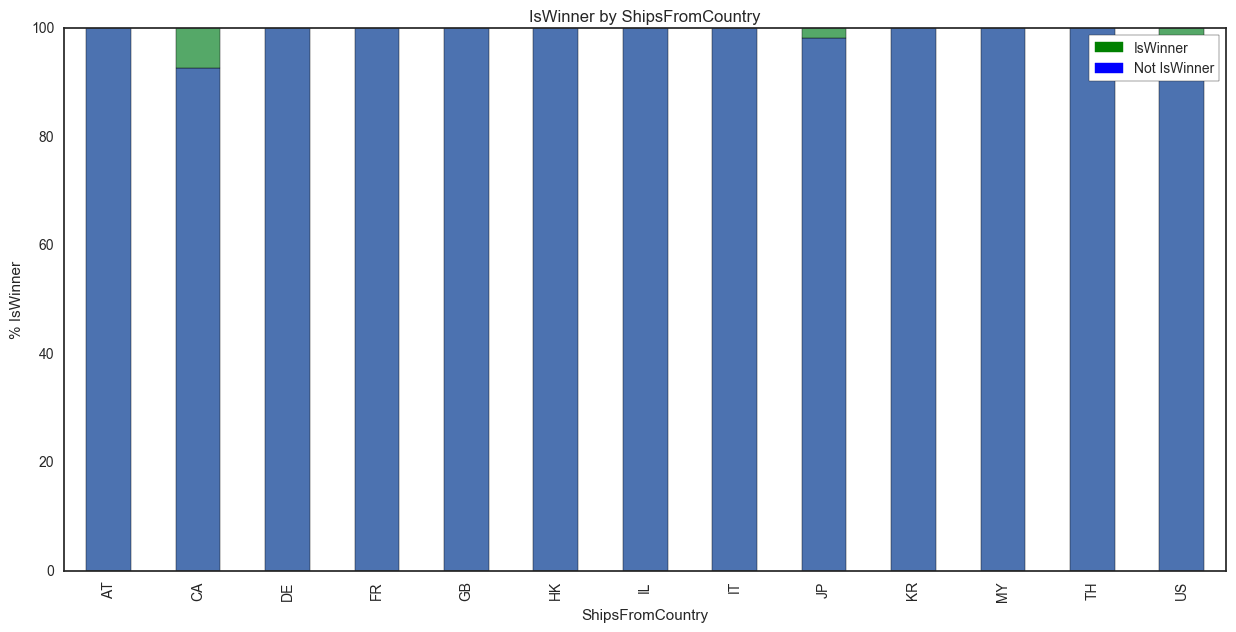

In [195]:
# List unique values in ShipsFromCountry
shipsfromcountries = pd.unique(clean_df.ShipsFromCountry.ravel())

# Insert new column in df called 'percent' and fill with 0s
clean_df['percent'] = 0

# Iterate through the unique values in ShipsFromCountry and for each value count the amount of IsWinner 
# Find the indexes of each row in a particular ShipsFromCountry and for each of these row insert count * 100 in the percent column
for c in shipsfromcountries:
    count = 1 / clean_df[clean_df.ShipsFromCountry == c].count()['IsWinner']
    index_list = clean_df[clean_df['ShipsFromCountry'] == c].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by ShipsFromCountry and IsWinner and sum
group = clean_df[['percent','ShipsFromCountry','IsWinner']].groupby(['ShipsFromCountry','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="IsWinner by ShipsFromCountry", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsWinner')
blue_patch = mpatches.Patch(color='blue', label='Not IsWinner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromCountry")
my_plot.set_ylabel("% IsWinner")
my_plot.set_ylim([0,100])

### IsWinner by ShipsFromState

(0, 100)

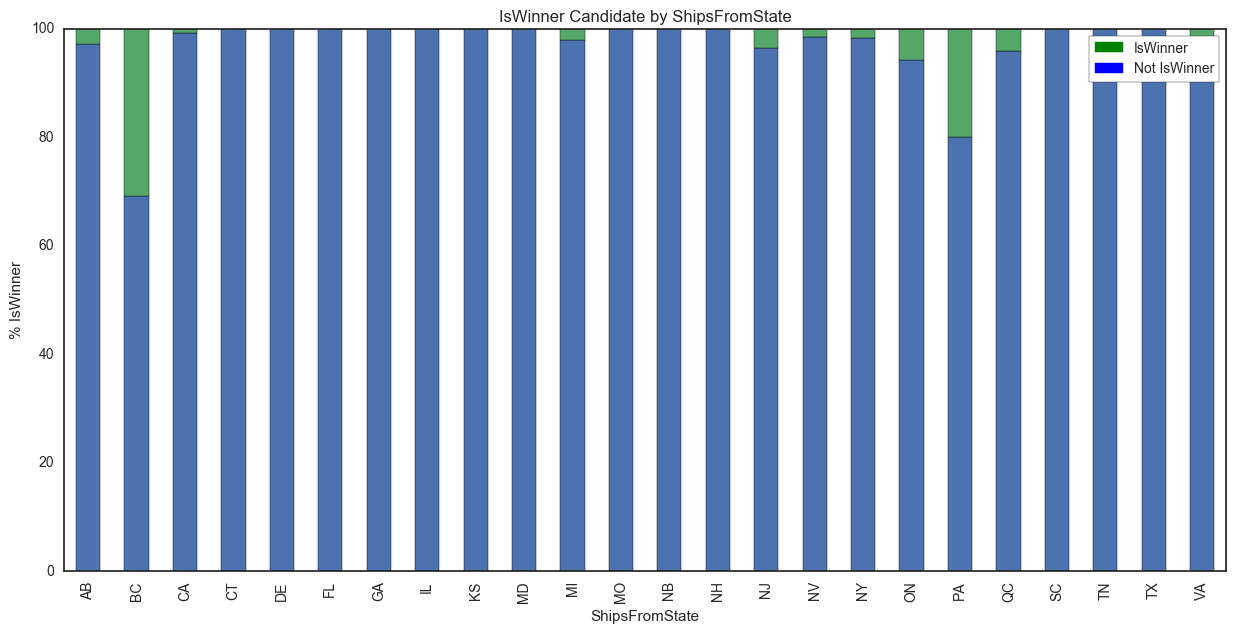

In [196]:
# List unique values in ShipsFromState
shipsfromstates = pd.unique(clean_df.ShipsFromState.ravel())

# Insert new column in df called 'percent' and fill with 0s
clean_df['percent'] = 0

# Iterate through the unique values in ShipsFromState and for each value count the amount of IsWinner 
# Find the indexes of each row in a particular ShipsFromState and for each of these row insert count * 100 in the percent column
for c in shipsfromstates:
    count = 1 / clean_df[clean_df.ShipsFromState == c].count()['IsWinner']
    index_list = clean_df[clean_df['ShipsFromState'] == c].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by ShipsFromState and IsWinner and sum
group = clean_df[['percent','ShipsFromState','IsWinner']].groupby(['ShipsFromState','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="IsWinner Candidate by ShipsFromState", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsWinner')
blue_patch = mpatches.Patch(color='blue', label='Not IsWinner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromState")
my_plot.set_ylabel("% IsWinner")
my_plot.set_ylim([0,100])

## Continuous-categorical feature plots

In this section, I plot all continuous features with the categorical feature 'IsWinner' in box plots.

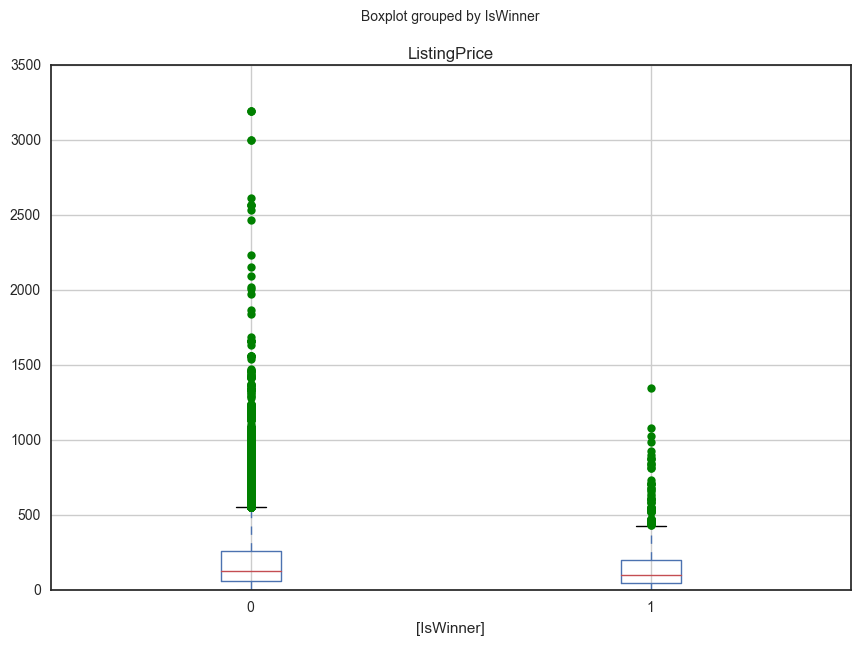

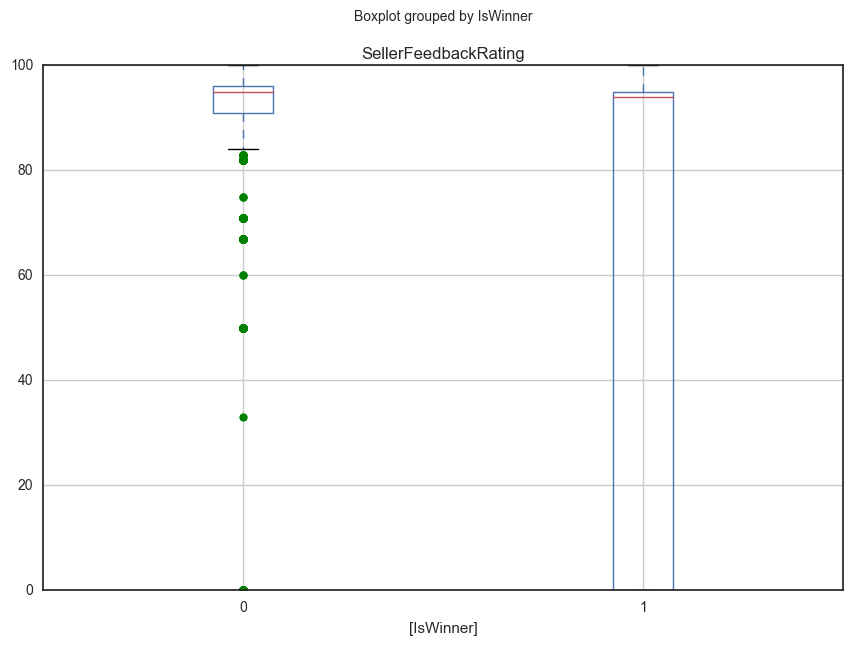

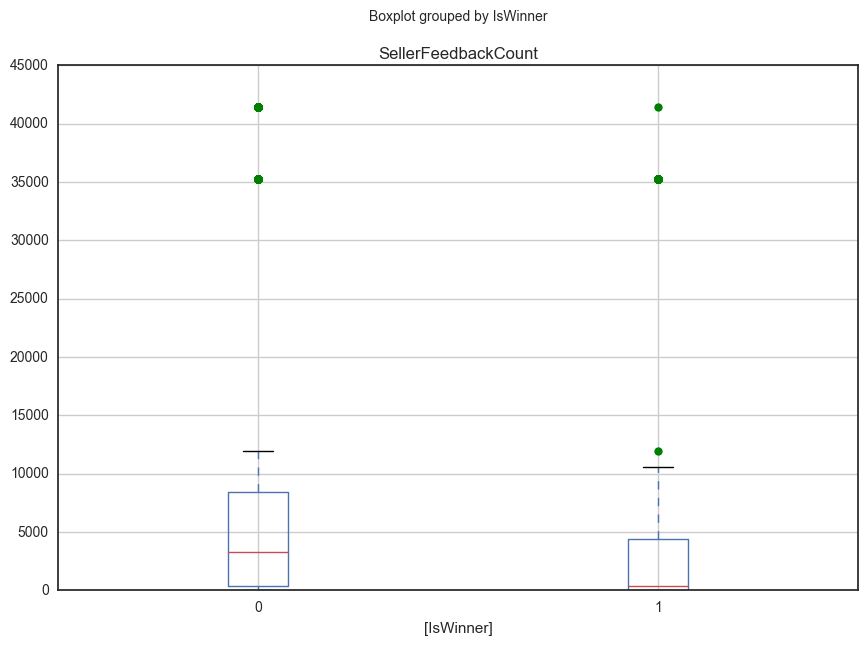

In [197]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = clean_df.boxplot(column=['ListingPrice'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['SellerFeedbackRating'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['SellerFeedbackCount'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))


## Correlations for the numeric features

Correlation matrix for the continuous features.

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

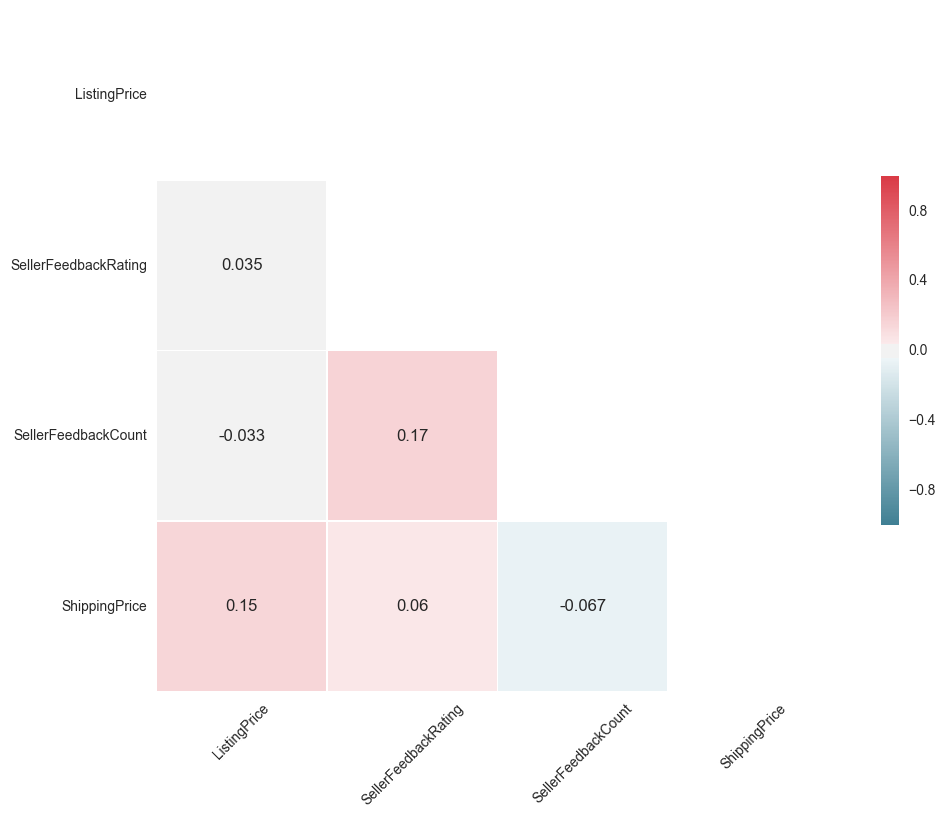

In [198]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
clean_df = pd.read_csv('amazon-offers-samples-raw-cleaned.csv')
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = clean_df[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice']].columns

# Calculate correlation of all pairs of continuous features
corr = clean_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (IsWinner)? Explain in plain words (a short paragraph) the story of your findings so far.

#### The following observations are made from the categorical-categorical feature plots:
IsWinner by IsFeaturedMerchant - about 10% of the positive IsFeaturedMerchant category has positive IsWinner outcome. None of the merchants who are not featured has a positive IsWinner outcome. Therefore, looking at this data set alone, merchants not featured will not have a positive IsWinner outcome. Merchants who are featured do have a chance of having a positive target outcome, though it is quite rare. Therefore, I conclude that other factors also play a large part in bringing about a positive target outcome.

IsWinner by IsFulfilledByAmazon - the IsWinner outcome is present in both cases. However, the IsWinner outcome occurs for about 60% of the time when fullfilled by Amazon, and less than 10% of the time when not. Therefore, a merchant for whom the 'IsFulfilledByAmazon' is positive has a far greater chance of a positive IsWinner outcome than one who is not.

IsWinner by ShipsFromCountry - there are only 3 countries with a positive IsWinner outcome. Canada(CA) has the highest, with 10%, Japan(JP) and United States(US) have less than 5% each. It must be noted here that from previous analysis there is 37% null values in ShipsFromCountry category. Therefore, even within this limited dataset, there is a substantial amount of missing data for this plot. Also, the majority of the dataset is within a small set of regions which would skew the results in favour of those regions.

IsWinner by ShipsFromState - two states, British Columbia(BC), in Canada and Pennsylvania(PA) in the US, have 30% and 20% positive outcomes for the target IsWinner. This is consistent with the country results above. Again, the null values this category is very high at 41%. As noted above, in 'IsWinner by ShipsFromCountry', the dataset is within a limited set of regions which could skew the results.

#### Continuous-categorical feature plots (Box Plots):
SellerFeedbackRating - the median for this data for both positive and negative IsWinner outcomes is approximately 95%. The negative result sits within a narrow band of between 85% and 100% with quartiles one to three of the data between 85% and 95%. In contrast, a positive outcome for IsWinner has a broad range, from 0% to 100%, and has the first to third quartiles below 95%, with fourth quartile above 95%. It is difficult to draw any inferences here other than that a positive target outcome has a broad range and a negative outcome a narrow range.

SellerFeedbackCount - both positive and negative IsWinner outcomes lie below the 15k count mark. There are outliers in both instances. It is difficult to draw any inferences here.

ListingPrice - the plot is quite similar in both outcome, and again it is difficult to draw any inferences here.

#### Correlations for the numeric features:
There does not appear to be any real correlation between the numeric features in this dataset.

#### Limitations in dataset:
The overall analysis of the dataset leads to the following observations:
- At 10k rows, the dataset is relatively small for the type of analysis and target outcome set out.
- Data has been collected over a short period, given by TimeOfOfferChang date 2016-02-04.
- The regions included in the dataset are also limited, predominently Canada (British Columbia), some regions in the US, and then small amounts of data relating to other regions.

A larger, more representative data set would yield better analysis and results for the IsWinner target outcome.

